# NORIA-O / SotA Ontologies

This notebook is part of the *NORIA-O SotA resources* from the https://w3id.org/noria/ project.
Its purpose is to help analyzing the list of data models and dataset of data models related to the NORIA-O field that were gathered prior to the design of NORIA-O.

Prerequisites:

* Get the noria-sota-ontology list in Turtle syntax and run SPARQL analysis queries on it.
* Get the oops! reports and aggregate the results.

... see the companion README.md file for more details

## Import and init

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import os

## Studying OOPS! pitfalls

First, we load the aggregated oops analysis results. Then, we compute statistics on them.

In [3]:
pitfalls_filepath = r"../dm-rdf/oops-stats-one-file.csv"
pitfalls_data = pd.read_csv(pitfalls_filepath)
pitfalls_data['group'] = pitfalls_data['group'].str.replace('/oops-stats.csv', '', regex=False)
pitfalls_data['group'] = pitfalls_data['group'].str.replace('./', '', regex=False)

Distribution for the pitfalls *importance value*:

<Axes: xlabel='pit_importance'>

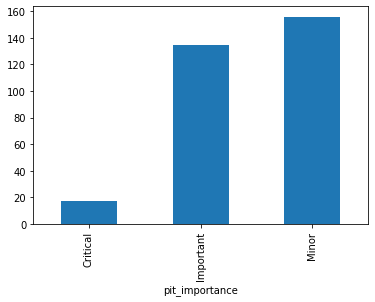

In [4]:
pi = pitfalls_data.value_counts("pit_importance", ascending=True)
pi.plot.bar()

Distribution for the pitfalls *kind* (code):

In [5]:
pc = pitfalls_data.value_counts("pit_code", ascending=True)

<Axes: xlabel='pit_code'>

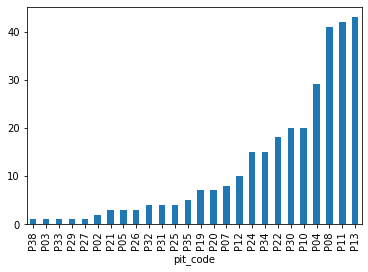

In [6]:
pc.plot.bar()

Ranking ontologies by the number of pitfalls and their importance:

* Compute a pivot table.
* Compute an $ImportanceScore = w_1 * Minor + w_2 * Important + w_3 * Critical$.
* Sort the table by the $ImportanceScore$.
* Display the table.

In [7]:
pt = pd.pivot_table(pitfalls_data, index="group", columns="pit_importance", values="pit_count", fill_value=0, aggfunc=sum)

In [8]:
pt['importance_score'] = pt.apply(lambda row: (5 * row.Critical) + (3 * row.Important) + row.Minor, axis=1)
pts = pt.sort_values('importance_score')
pts

pit_importance,Critical,Important,Minor,importance_score
group,,,,
FOAF,0,8,0,24
PEP,0,6,11,29
SLOGERT-LOGEX,0,4,19,31
EventKG,0,5,19,34
EMOCA,0,1,32,35
OWL-Time,0,6,20,38
CASE,0,9,14,41
BOT,0,8,19,43
HTTP,0,7,22,43


Compared distribution of the pitfall importance for each data model:

<Axes: xlabel='group'>

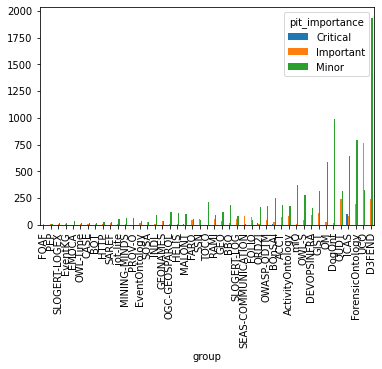

In [9]:
pts.loc[:, pts.columns != 'importance_score'].plot.bar()